In [1]:
import glob
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_paths(folder_pattern):
    results_paths = glob.glob(folder_pattern)
    # filter to include only directories
    results_paths = [folder for folder in results_paths if os.path.isdir(folder)]
    return results_paths

In [3]:
def get_results(results_paths):
    results_best_models = []
    results_last_models = []
    train_loss_all = []
    train_rewards_all = []

    for path in results_paths:
        json_path = os.path.join(path, 'report.txt')
        with open(json_path, 'r') as f:
            data = json.load(f)
            last_avg_rewards = data['test_last_model_rewards']
            best_avg_rewards = data['test_rewards']
            train_rewards = data['train_rewards']
            train_loss = data['train_loss']
        results_best_models.append(best_avg_rewards)
        results_last_models.append(last_avg_rewards)
        train_rewards_all.append(train_rewards)
        train_loss_all.append(train_loss)
    return results_best_models, results_last_models, train_loss_all, train_rewards_all

In [4]:
def plot_series(rewards_all, title, ylabel='Reward', ylim=None, times=None, ylog=None):
    print(len(rewards_all))
    print(len(rewards_all[0]))
    episodes = list(range(len(rewards_all[0])))
    rewards_all = np.array(rewards_all)

    median_rewards = np.median(rewards_all, axis=0)
    q1_rewards = np.percentile(rewards_all, 25, axis=0)
    q3_rewards = np.percentile(rewards_all, 75, axis=0)
    min_rewards = np.min(rewards_all, axis=0)
    max_rewards = np.max(rewards_all, axis=0)

    plt.figure(figsize=(12, 9))

    if ylim is not None:
        plt.ylim(0, ylim)
    
    if ylog is not None:
        plt.yscale('log')
        
    # Plot the range of values in light grey
    plt.fill_between(episodes, min_rewards, max_rewards, color='lightgrey', label='Range of values')

    # Plot the median values
    plt.plot(episodes, median_rewards, label='Median')
    plt.grid()

    # Plot the 1st and 3rd quantiles
    plt.fill_between(episodes, q1_rewards, q3_rewards, alpha=0.3, color='orange', label='25-75 percentile')

    plt.xlabel('Episodes')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    
    if times is not None:
        plt.text(0.05, 0.05, 'Mean running time for all episodes {}'.format(sum(times)/len(times)), transform=plt.gca().transAxes, fontsize=15, color='black')
    plt.savefig("images/"+title+".png", dpi=300)
    # plt.show()

In [5]:
def plot_comparison(rewards1, rewards2, title, ylabel='Reward', ylim=None, times=None, ylog=None):
    episodes = list(range(len(rewards1[0])))
    rewards1 = np.array(rewards1)
    rewards2 = np.array(rewards2)

    # Calculate statistics for both sets of rewards
    stats1 = {
        'median': np.median(rewards1, axis=0),
        'q1': np.percentile(rewards1, 25, axis=0),
        'q3': np.percentile(rewards1, 75, axis=0),
        'min': np.min(rewards1, axis=0),
        'max': np.max(rewards1, axis=0),
    }

    stats2 = {
        'median': np.median(rewards2, axis=0),
        'q1': np.percentile(rewards2, 25, axis=0),
        'q3': np.percentile(rewards2, 75, axis=0),
        'min': np.min(rewards2, axis=0),
        'max': np.max(rewards2, axis=0),
    }

    # Create a subplot with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    for i, (ax, stats, label) in enumerate(zip(axs, [stats1, stats2], ['Best model', 'Last model'])):
        if ylim is not None:
            ax.set_ylim(0, ylim)

        if ylog is not None:
            ax.set_yscale('log')

        ax.fill_between(episodes, stats['min'], stats['max'], color='lightgrey', label='Range of values')
        ax.plot(episodes, stats['median'], label='Median')
        ax.fill_between(episodes, stats['q1'], stats['q3'], alpha=0.3, color='orange', label='25-75 percentile')
        ax.set_xlabel('Episodes')
        ax.set_ylabel(ylabel)
        ax.set_title(f"{title} - {label}")
        ax.legend()

        if times is not None and i == 1:
            ax.text(0.05, 0.05, f'Mean running time for all episodes {sum(times)/len(times)}', 
                    transform=ax.transAxes, fontsize=15, color='black')

    plt.tight_layout()
    plt.savefig(f"images/{title}.png", dpi=300)
    plt.show()


### Paper recreation results

In [93]:
results_paths = get_paths(folder_pattern='results_recreation/results_*')
results_best_models, results_last_models, train_loss_all, train_rewards_all = get_results(results_paths)

30
600


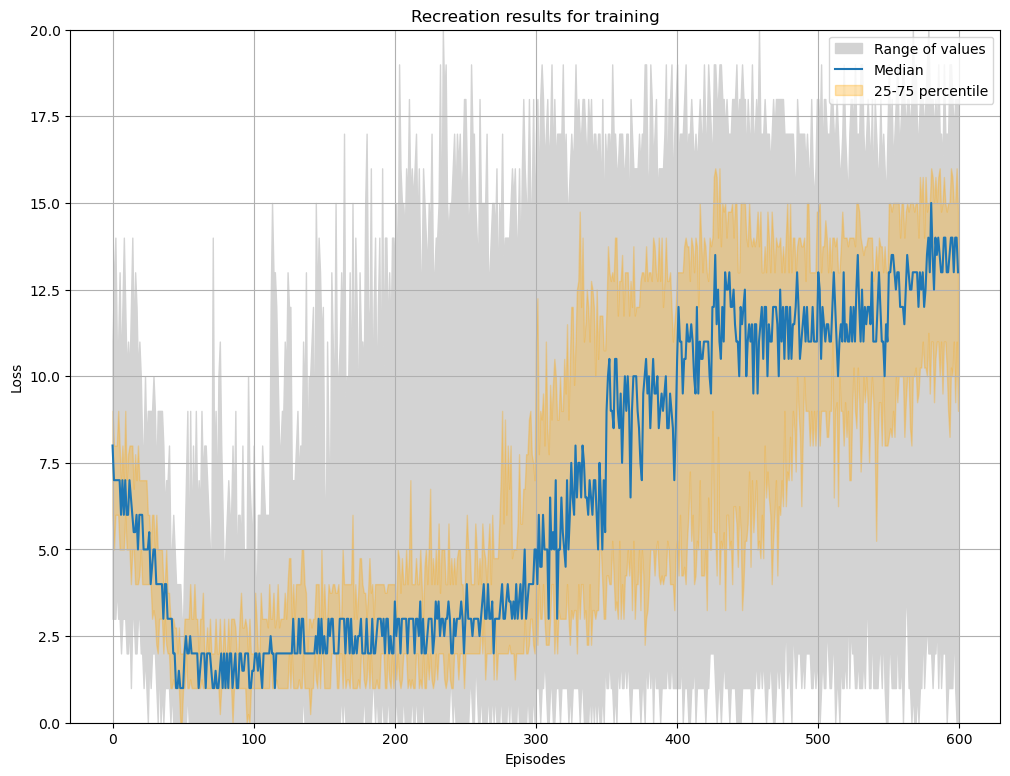

In [94]:
plot_series(train_rewards_all, ylabel="Loss", title="Recreation results for training", ylim=20.0)

30
600


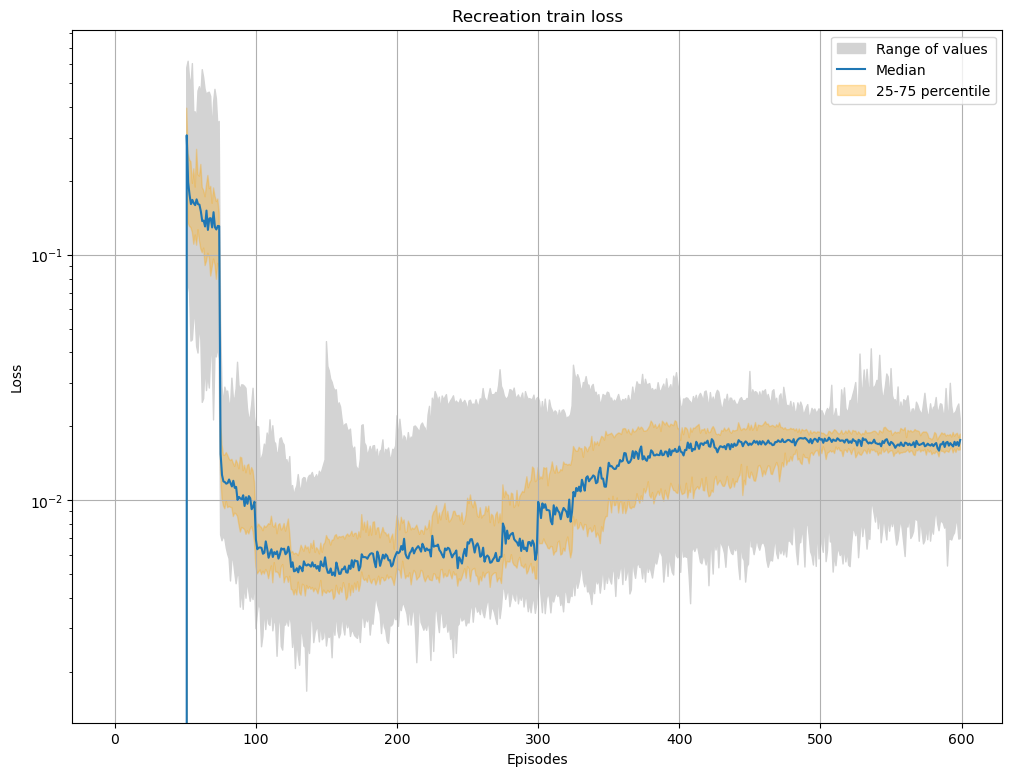

In [95]:
plot_series(train_loss_all, ylabel="Loss", title="Recreation train loss", ylog=True)

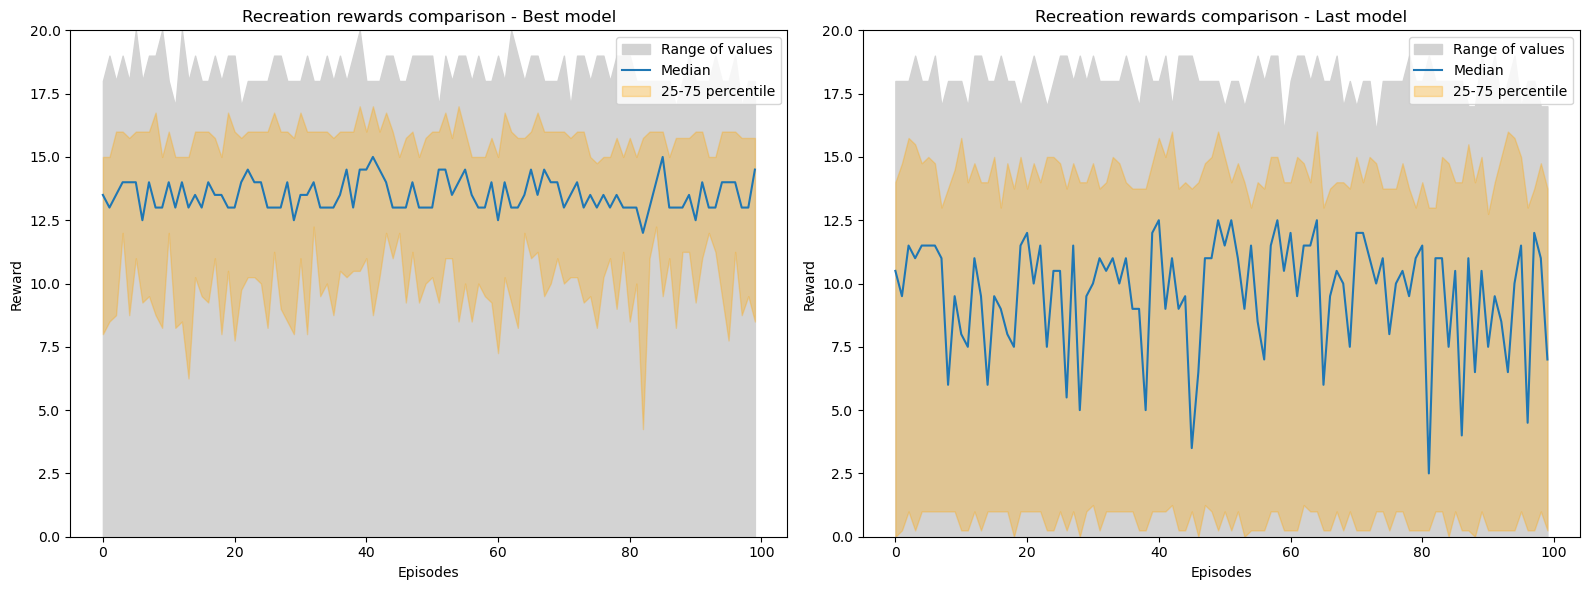

In [96]:
plot_comparison(results_best_models, results_last_models, "Recreation rewards comparison", ylim=20)

### Running Example Results (Paper Extension)

In [10]:
results_paths = get_paths(folder_pattern='results_extension/results_*')
results_best_models, results_last_models, train_loss_all, train_rewards_all = get_results(results_paths)

20
600


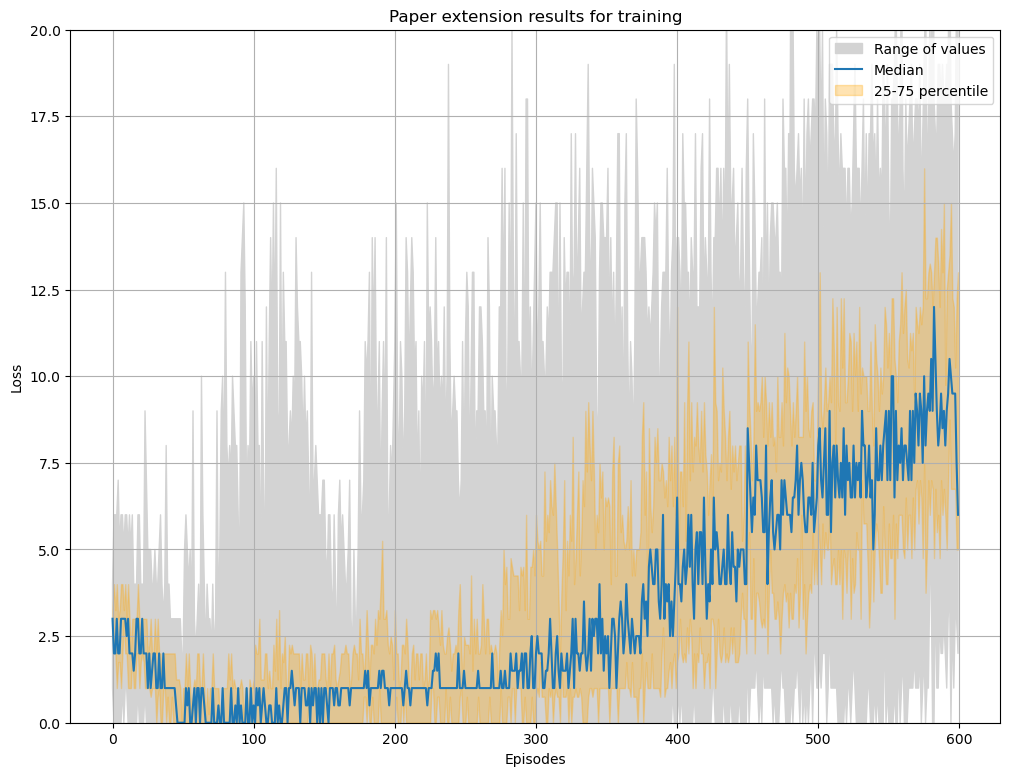

In [11]:
plot_series(train_rewards_all, ylabel="Loss", title="Paper extension results for training", ylim=20.0)

20
600


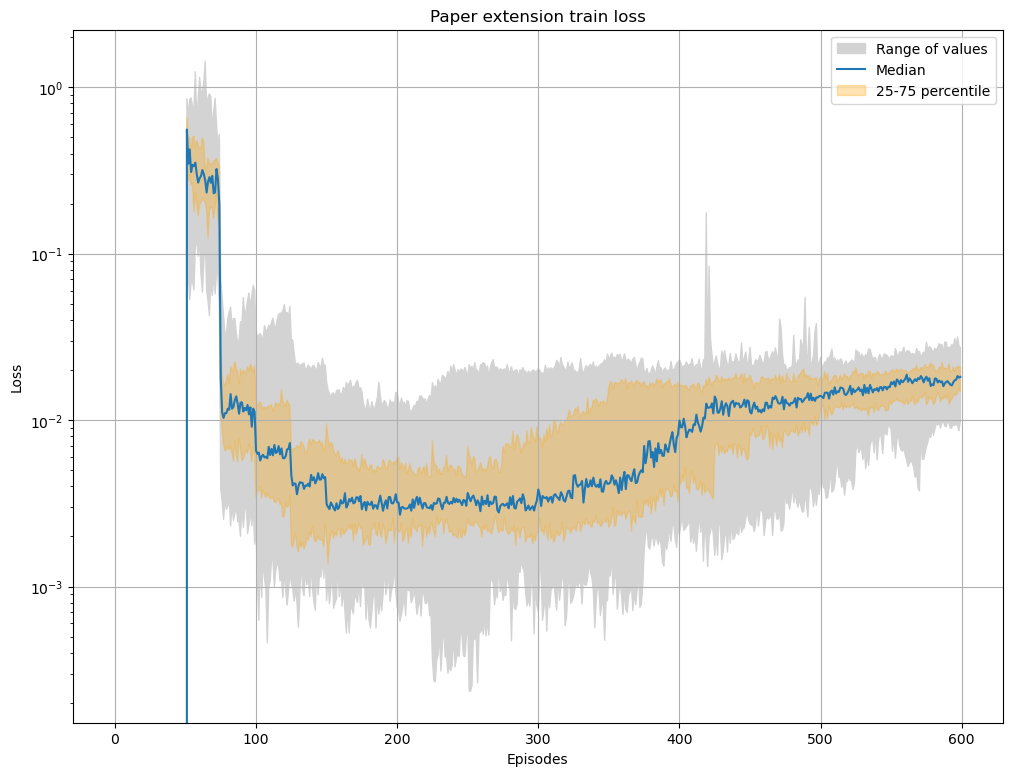

In [12]:
plot_series(train_loss_all, ylabel="Loss", title="Paper extension train loss", ylog=True)

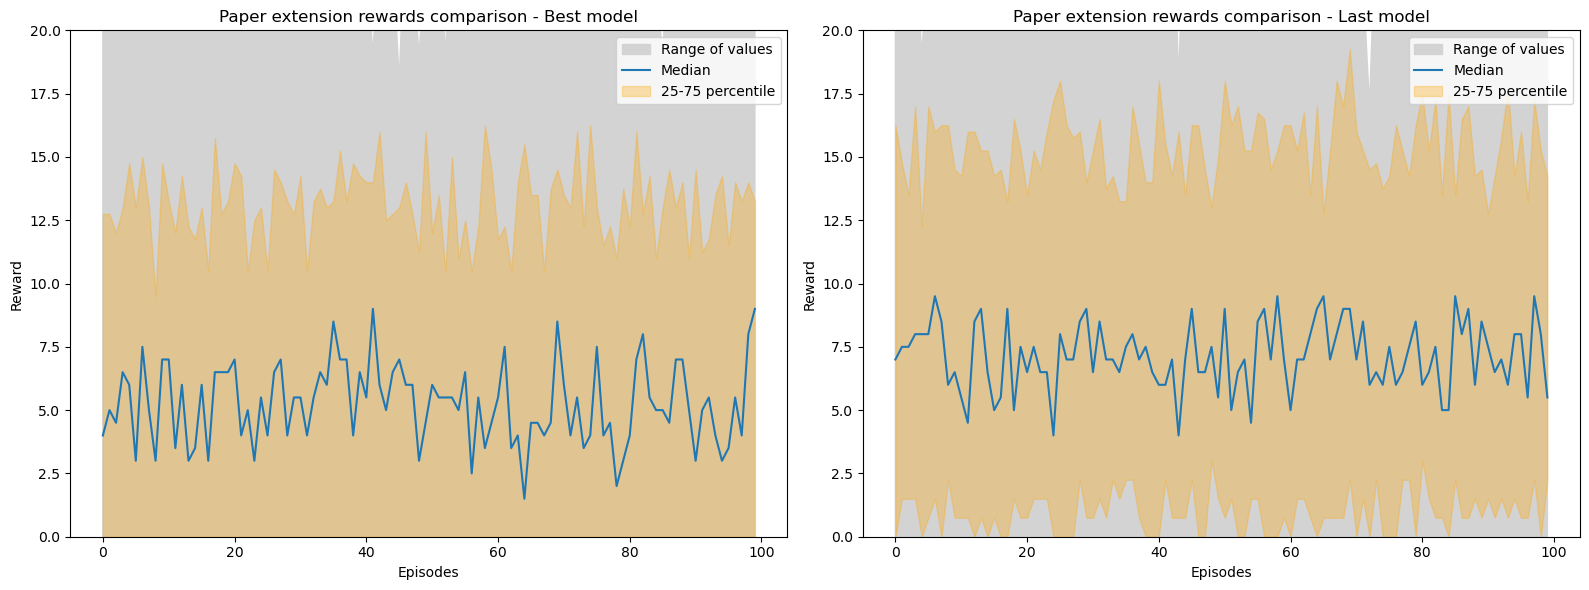

In [13]:
plot_comparison(results_best_models, results_last_models, "Paper extension rewards comparison", ylim=20)